In [2]:
# imoprt needed packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import utilities_visuals as ut

import ArgModel as normal_am
import reducedArgModel as reduced_am


In [3]:
# creates a heatmap that shows how opinions develop over time.
def plot_iterations(opinions_over_time, no_of_bins, lmts):

    # sets the upper and lower limits for the y-axis
    spread = np.floor(lmts[1])-np.ceil(lmts[0])

    stepsize = spread/no_of_bins

    # to show the data in a 2d heatmap, they are written into a 2d array
    data_in_proper_form = np.zeros((no_of_bins, len(opinions_over_time)))
    hel = len(data_in_proper_form)
    
    #restructuring data to allow for the heatmap to be generated
    for i in range(len(opinions_over_time)):
        for j in range(hel):
            data_in_proper_form[j][i] = ut.count_no_of_occurence_in_intervall(np.ceil(lmts[0]), (np.floor(lmts[1]))-stepsize*(j+1), (np.floor(lmts[1]))-stepsize*j,
                                                                            opinions_over_time[i])
    
    return data_in_proper_form, [0 , len(opinions_over_time), lmts[0] , lmts[1]]

In [4]:
# creates a single plot that shows most of the collected data from a single model run. It includes the distribution of attitudes and evaluations, as well as the norms and the outcome measures over time
def create_one_peek_plot(matr, NO_OF_BINS, C):
    # set size of final plot
    fig = plt.figure(figsize=(15,3))
    # sets the structure of the subplots
    axs = fig.subplot_mosaic(
        """
        aa
        """
    )
    fig.suptitle('Trajectories of a single simulation run', fontsize=10, y=0.95)

    fontsize = 8


    # calulates the maximal and minimal possible attitude based on C
    if C is None:
        no_modelled_args_per_side = 4
        lims = np.array([[-no_modelled_args_per_side,no_modelled_args_per_side]])
    else:
        lims = ut.calc_min_max_atts(C)

    cmap_out_group = mpl.cm.Reds
    cmap_out_group.set_under(color='white')

    # sets the max values for the heatmap creation to ensure that results throughout different subplots are comparable
    _max = matr.shape[1]

    # creates the first subplot which shows the distribution of attitudes.
    att=0
    axs_key = 'a'
    if C is None:
        data_to_visualize = list(no_modelled_args_per_side * matr[:,:])
    else:
        data_to_visualize = list(matr)


    data, extent = plot_iterations(data_to_visualize, NO_OF_BINS, (lims[0][0]-0.1, lims[0][1]+0.1))
    cont2 = axs[axs_key].imshow(data, extent = extent, cmap=cmap_out_group, interpolation='None', aspect='auto', vmin=0.001, vmax = _max)
    axs[axs_key].set_title(f"Distribution of attitude {att+1} over time", fontsize=fontsize)
    axs[axs_key].grid(visible=True, axis='both', color='black', alpha=0.3)
    axs[axs_key].tick_params(axis="x", labelsize=fontsize)



In [24]:
# defines the parameters needed to run the model
params = {
    "no_of_agents": 1078,
    "no_of_iterations": 2000,
    # number of evaluations
    "M": 8,
    # strength of biased processing
    "ß": 3.2,
    "C": None,
    # binary variable indicating what data to return at the end of the simulation
    "SPA": False}

# simulates a model run and saves the returned data for later use
loal = reduced_am.simulate_agent_interaction(params["no_of_agents"], params["no_of_iterations"], params["M"],
                                             params["ß"], params["SPA"])

# changes the data type of the variable from list of 2d-arrays to a 3d-array
matr = ut.rearrange_attitude_list(loal)


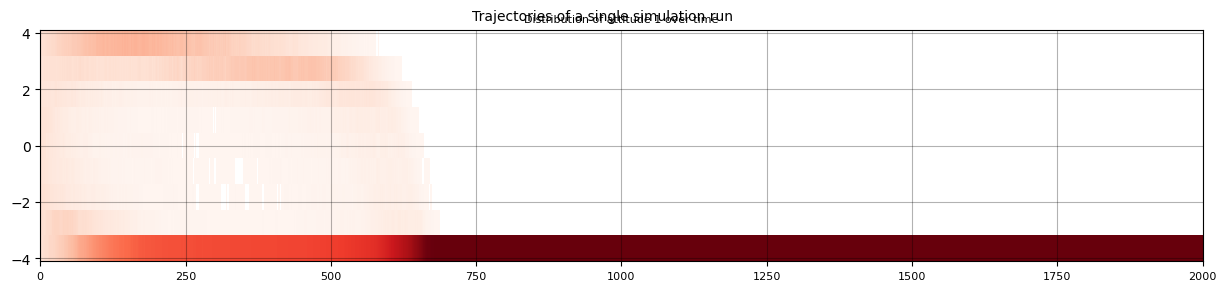

In [25]:
#creates the one look peek for a single simulation
fig = create_one_peek_plot(matr, 9, params["C"])

In [26]:
# defines the parameters needed to run the model
params = {
    "no_of_agents": 1078,
    "no_of_iterations" : 2000,
    # strength of biased processing
    "ß": 0.8,
    # linkage matrix
    "C": np.asmatrix([1, 1, 1, 1, -1, -1, -1, -1], dtype=np.float64),
    # binary variable indicating what data to return at the end of the simulation
    "SPA": False}

loal, lovl = normal_am.simulate_agent_interaction(params["no_of_agents"], params["no_of_iterations"], params["ß"],
                                                  params["C"], params["SPA"])

# changes the data type of the variable from list of 2d-arrays to a 3d-array
matr = ut.rearrange_attitude_list(loal)

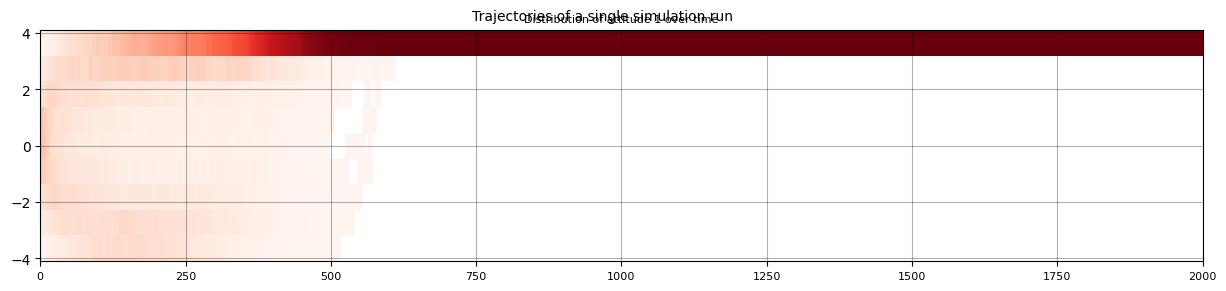

In [27]:
#creates the one look peek for a single simulation
fig = create_one_peek_plot(matr, 9, params["C"])